#### Application Lab 0: Python Essentials for Geoscientific Data Analysis
Prof. Maroon, AOS 575, UWisc <br>
Last updated: 9/8/2020


#### Objectives 
The objectives of this application lab are:<br>
1. Understand how to interpret the structure of csv and netcdf files
2. Manipulate pandas and xarray objects
3. Explore different types of matplotlib plots 

In [1]:
#import packages
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

#### Dataset 1: Daily Madison Data

First things first, let's load in our dataset. Daily Madison data from 1939-2017 is saved as a CSV file, so we use pandas.

In [2]:
filename1='KMSN_1939_10_01_GHCN.csv'
df1=pd.read_csv(filename1)

<b>Always, always, always print out your data!</b> In jupyter notebooks, you can do this with just writing the variable name as the last thing in the cell. In a plain-jane python script, you'd need to instead write print(df1).

In [3]:
df1

STATION                            STATION_NAME      DATE  \
0      GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  19391001   
1      GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  19391002   
2      GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  19391003   
3      GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  19391004   
4      GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  19391005   
...                  ...                                     ...       ...   
28230  GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  20170114   
28231  GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  20170115   
28232  GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  20170116   
28233  GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  20170117   
28234  GHCND:USW00014837  MADISON DANE CO REGIONAL AIRPORT WI US  20170118   

          PRCP    SNWD    SNOW  TAVG  TMAX  TMIN    WESD  
0         0.00     0.0     0.0 -9999    67    33 -9999.0  
1         0.00     0.0     0.0 -9999    70    38 -9999.0  
2         0.00     0.0     0.0 -9999    74    48 -9999.0  
3         0.00     0.0     0.0 -9999    81    51 -9999.0  
4         0.00     0.0     0.0 -9999    70    56 -9999.0  
...        ...     ...     ...   ...   ...   ...     ...  
28230     0.00     1.2     0.0    16    27    10 -9999.0  
28231     0.00     1.2     0.0    17    33     6 -9999.0  
28232     0.61     1.2     0.0    27    34    20 -9999.0  
28233 -9999.00 -9999.0 -9999.0    33 -9999 -9999 -9999.0  
28234 -9999.00 -9999.0 -9999.0    33 -9999 -9999 -9999.0  

[28235 rows x 10 columns]

To select just the names of the columns:

In [4]:
df1.columns

Index(['STATION', 'STATION_NAME', 'DATE', 'PRCP', 'SNWD', 'SNOW', 'TAVG',
       'TMAX', 'TMIN', 'WESD'],
      dtype='object')

To select one of the variables out of the dataset for manipulation, use the name of the column as a string and then create a new object 

In [5]:
prcp=df1['PRCP']
print(prcp)

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
          ...   
28230       0.00
28231       0.00
28232       0.61
28233   -9999.00
28234   -9999.00
Name: PRCP, Length: 28235, dtype: float64


In this dataset, you'll notice that there're lots of -9999.00 floating around. This number indicates missing values for this dataset (other datasets will use other numbers!). With numpy its easier to deal with missing values if you replace them with a NaN object (np.nan). There are multiple ways to do this in Python. Here's one example taking advantage of numpy-based subsetting:

In [6]:
prcp_nan=prcp.copy()              #sometimes it's helpful to make fully copies of objects. If we didn't, then setting 
                                  #these two variables equal would point to the same object in memory.
                                  #sometimes pointing to the same object in memory can lead to confusion... let's avoid!
prcp_nan[prcp_nan<-1000]=np.nan   #this step "corrects" the NaN
print(prcp_nan)  

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
28230    0.00
28231    0.00
28232    0.61
28233     NaN
28234     NaN
Name: PRCP, Length: 28235, dtype: float64


Let's plot a time series of prcp:

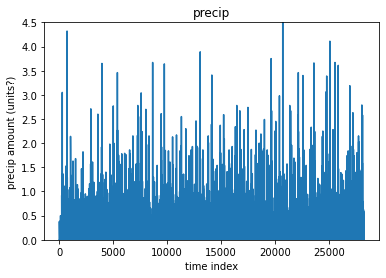

In [7]:
plt.plot(prcp_nan)
plt.title('precip')
plt.xlabel('time index')
plt.ylabel('precip amount (units?)')
plt.ylim([0,4.5]);

What if we only want to plot a time series of the times when there's measurable precip?  We can use numpy-based boolean selection to do that:

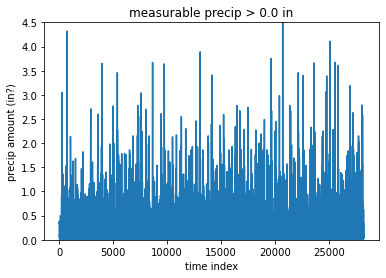

In [8]:
thresh=0.0
prcp_meas=prcp[prcp>thresh]  #This step does the subsetting

plt.plot(prcp_meas)
plt.title('measurable precip > '+str(thresh)+' in')
plt.xlabel('time index')
plt.ylabel('precip amount (in?)')
plt.ylim([0,4.5]);

From the figure, it's hard to determine if that worked or not, so let's use a more strigent subselection for visual confirmation. Let's select events where precip is greater than 0.5": 

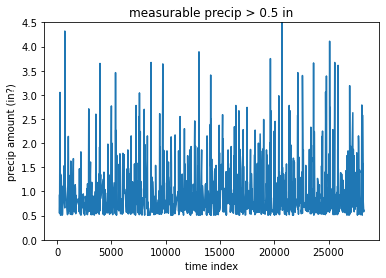

In [9]:
thresh=0.5
prcp_meas2=prcp[prcp>thresh]  #This step does the subsetting

plt.plot(prcp_meas2)
plt.title('measurable precip > '+str(thresh)+' in')
plt.xlabel('time index')
plt.ylabel('precip amount (in?)')
plt.ylim([0,4.5]);

Ok, I think that's working, don't you? <br><br>
Next, let's check out what measurable precip looks like as a distribution. For this we are going to use function called histogram. We're specifying our bins to be more evenly divisible. This is an option the function would work fine without it, but it makes our bins cleaner.

In [10]:
pr_min=0
pr_max=np.ceil(prcp.max())  #ceil=ceiling. It rounds up to the nearest integer. 
nbins=20

hist, bin_edges = np.histogram(prcp_meas, range=(pr_min,pr_max),bins=nbins)
bin_cents=(bin_edges[0:-1]+bin_edges[1:])/2

print('This is the histogram counts per bin: ',hist)
print('These are the edges for each bin: ',bin_edges)
print('These are the centers for each bin: ',bin_cents)

This is the histogram counts per bin:  [6317 1428  664  375  199  105   68   53   25   17   20    6    5    5
    6    2    1    1    1    0]
These are the edges for each bin:  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.  ]
These are the centers for each bin:  [0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 2.125 2.375 2.625 2.875
 3.125 3.375 3.625 3.875 4.125 4.375 4.625 4.875]


We can use this information to calculate the probability of being in each bin by normalizing by a sum of all the counts, and also create a probability density function:

In [11]:
probability=hist/np.sum(hist)   #normalization = range(0,1)

binwidth=((pr_max-pr_min)/nbins)
pdf=probability/binwidth  #making a pdf by dividing by the bin-width

print('Probability in each bin: ',probability)
print('This should add to 1: ',np.sum(probability))


Probability in each bin:  [6.79393418e-01 1.53581415e-01 7.14132071e-02 4.03312540e-02
 2.14024521e-02 1.12927511e-02 7.31340073e-03 5.70015057e-03
 2.68875027e-03 1.82835018e-03 2.15100022e-03 6.45300065e-04
 5.37750054e-04 5.37750054e-04 6.45300065e-04 2.15100022e-04
 1.07550011e-04 1.07550011e-04 1.07550011e-04 0.00000000e+00]
This should add to 1:  1.0


Text(0.5, 1.0, 'pdf')

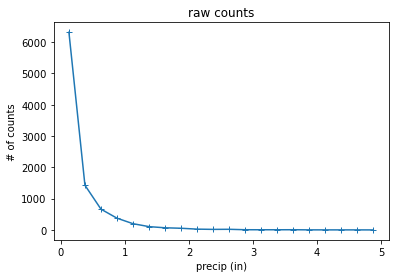

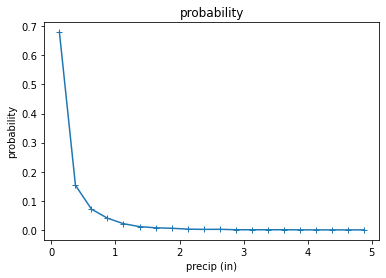

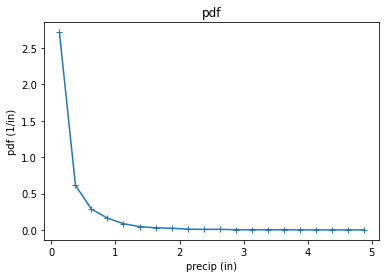

In [12]:
f=plt.figure()
plt.plot(bin_cents,hist,marker='+') # a quick line plot - better would be a bar plot!
plt.xlabel('precip (in)')
plt.ylabel('# of counts')
plt.title('raw counts')

f=plt.figure()
plt.plot(bin_cents,probability,marker='+') # a quick line plot - better would be a bar plot!
plt.xlabel('precip (in)')
plt.ylabel('probability')  #not a PDF because not normalizing by the bin width!!
plt.title('probability')

f=plt.figure()
plt.plot(bin_cents,pdf,marker='+') # a quick line plot - better would be a bar plot!
plt.xlabel('precip (in)')
plt.ylabel('pdf (1/in)')  #Yes a PDF!
plt.title('pdf')

What if we want to figure out of the total days when precip occurred, what's the probability of there being greater than 1.47"?

In [13]:
#first subselect the number of days where greater than 1.47 and determine how many days are in that array:
thresh=1.47
prob_gt=prcp_meas[prcp_meas>thresh] #subselect just the greater than days
num_days_gt=len(prob_gt)            #count the number of days left

#next, determine how many total days there are:
total_days=len(prcp_meas)

#The probability is then:
print('The probability of greater than '+str(thresh)+' inches of rain on days with measurable precip is:',num_days_gt/total_days)

The probability of greater than 1.47 inches of rain on days with measurable precip is: 0.02301570230157023


How about the cumulative probability?

Probability in each bin:  [0.67939342 0.83297483 0.90438804 0.94471929 0.96612175 0.9774145
 0.9847279  0.99042805 0.9931168  0.99494515 0.99709615 0.99774145
 0.9982792  0.99881695 0.99946225 0.99967735 0.9997849  0.99989245
 1.         1.        ]
The last index should be 1:  1.0


Text(0, 0.5, 'cumulative probability')

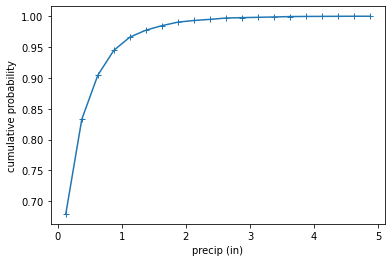

In [14]:
cumulative_prob=np.cumsum(hist)/np.sum(hist)  #normalization = range(0,1)

print('Probability in each bin: ',cumulative_prob)
print('The last index should be 1: ',cumulative_prob[-1])

f=plt.figure()
plt.plot(bin_cents,cumulative_prob,marker='+') # a quick line plot - better would be a bar plot!
plt.xlabel('precip (in)')
plt.ylabel('cumulative probability') 

The better way to plot this is using the matplotlib.pyplot.hist function - we'll get bars easily that way. It will do the whole histogramming process for us. 

Text(0.5, 0, 'precip (in)')

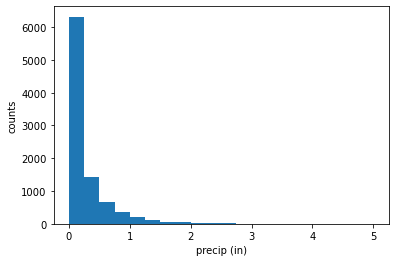

In [15]:
plt.hist(prcp_meas,range=(pr_min,pr_max),bins=nbins)
plt.ylabel('counts')
plt.xlabel('precip (in)')

That's effectively the same plot as before, but using bars, which visually cues that the bins are discrete rather than continuous (as the line plot implies). Note that by default it's expressing the bar height in counts. It also has options for density (pdf) and cumulative histogram.

Text(0.5, 1.0, 'cumulative probability')

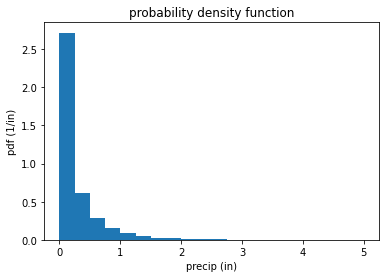

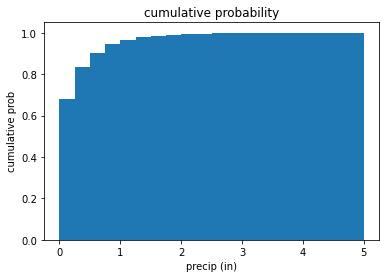

In [16]:
f=plt.figure()
plt.hist(prcp_meas,range=(pr_min,pr_max),bins=nbins,density=True)
plt.ylabel('pdf (1/in)')
plt.xlabel('precip (in)')
plt.title('probability density function')

f=plt.figure()
plt.hist(prcp_meas,range=(pr_min,pr_max),bins=nbins,cumulative=True,density=True)
plt.ylabel('cumulative prob')
plt.xlabel('precip (in)')
plt.title('cumulative probability')

#### Dataset 2: Hourly Madison Data
Our hourly Madison dataset is also saved as a CSV files, so we use pandas again. 

In [17]:
filename2='truax_2019.csv'
df2=pd.read_csv(filename2)

This time, it's your turn to practice. Print out the dataset. What variables are present in this dataset?

Type your answer here. See the dropdown menu above that says either Code, Markdown or Raw? Change a cell's mode to "Markdown" when you want to type in an answer. Leave as "Code" for code.

Select the variable for air temperature:

Replace any missing values with np.nan:

Make a time series plot of air temperature:

Subselect for only the times where temperature is above freezing:

Make a histogram of temperatures above freezing:

#### Dataset 3: HadISST SST
HadISST is an observation-based gridded SST product. Since it has three dimensions (time by lat by lon), we now use xarray. After we open up and print the dataset object, we're going to take a careful look at the structure of the dataset

In [18]:
filename3='HadISST_sst.nc'
ds1=xr.open_dataset(filename3)
print(ds1)

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1769)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2017-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    7/7/2017 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary 

First, notice that the object type is "xarray.Dataset".  If you wanted to know more about that type of object you could try print(help(ds1)), or you could google xarray Dataset and find the documentation online. <br><br>
The Dataset object has 5 sections: dimensions, coordinates, dimensions without coordinates, data variables, and attributes. Let's start with the attributes. You can select them by:

In [19]:
ds1.attrs

{'Title': 'Monthly version of HadISST sea surface temperature component',
 'description': 'HadISST 1.1 monthly average sea surface temperature',
 'institution': 'Met Office Hadley Centre',
 'source': 'HadISST',
 'reference': 'Rayner, N. A., Parker, D. E., Horton, E. B., Folland, C. K., Alexander, L. V., Rowell, D. P., Kent, E. C., Kaplan, A.  Global analyses of sea surface temperature, sea ice, and night marine air temperature since the late nineteenth century J. Geophys. Res.Vol. 108, No. D14, 4407 10.1029/2002JD002670',
 'Conventions': 'CF-1.0',
 'history': '7/7/2017 converted to netcdf from pp format',
 'supplementary_information': 'Updates and supplementary information will be available from http://www.metoffice.gov.uk/hadobs/hadisst',
 'comment': 'Data restrictions: for academic research use only. Data are Crown copyright see (http://www.opsi.gov.uk/advice/crown-copyright/copyright-guidance/index.htm)'}

In [20]:
ds1.attrs['history']

'7/7/2017 converted to netcdf from pp format'

The dimensions are just a single number indicating the length of each dimension. 

In [21]:
ds1_dims=ds1.dims
ds1_dims

Frozen(SortedKeysDict({'time': 1769, 'nv': 2, 'latitude': 180, 'longitude': 360}))

The dims object is just a fancy type of dictionary, so you could select the dimension by its name (as a string):

In [22]:
lat_dim=ds1_dims['latitude']
lat_dim

180

Coordinates contains the actual values for the latitude and longitude. You can select the coordinates for 

In [23]:
ds1_coords=ds1.coords
ds1_coords

Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2017-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5

Here you'll notice that the coords are single arrays and are named the same as the dimensions. For all the datasets that we'll use this term, this will be the case, but it isn't always this way. If you have a non-Cartesian grid, you can have 2-dimensional coordinates that are functions of both the lon and lat dimensions; this is common for ocean model output. 

In [24]:
ds1_coords['longitude']

<xarray.DataArray 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    units:          degrees_east
    long_name:      Longitude
    standard_name:  longitude

Note that when we print out longitude, this object also has its own attributes: units, long_name, standard_name. If you wanted to select one of these attributes individually, you could do it like this:

In [25]:
ds1_coords['longitude'].attrs['units']

'degrees_east'

The data variable is the piece that we will do most of our manipulation on. Again, we can select just the variable we want using square brackets and the name of the variable (as a string). Variables have attributes that can also be selected by .attr['name_of_attr']

In [26]:
sst=ds1['sst']
sst

<xarray.DataArray 'sst' (time: 1769, latitude: 180, longitude: 360)>
[114631200 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2017-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

Besides attributes, variables and coordinates also contain a numpy array that is an array of JUST the values without any labels, units, attributes, just a 3-d array (for sst).  To pull the values out as a numpy object:

In [34]:
sst_np=sst.values

You may have noticed that there was an asterisk appeared in the [] to the left of the cell above for a few seconds before it turned into a number.  When you use .values, this forces the numpy array to be read into memory, which takes a few seconds.  xarray by default uses "lazy computing," which means that it won't read anything into memory until it absolutely has to. This is why some cells may seem to execute quickly, but then the final cell with the plot takes forever. Making a plot finally forced the computation (which takes time). <br><br>
Much of the time in this class we will use xarray objects (not the underlying numpy object) because they have properties that make them easy to work with. For example, taking a time-mean of the whole sst dataarray only requires the label for the dimension that you're taking the mean over ('time'). You don't need to remember if time was the 0-th dimension or the 1st dimension or etc.:

In [28]:
sst_timemean=sst.mean('time')

/opt/anaconda3/envs/aos575/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Let's make a quick map using contourf to see what the time mean sst looks like. Does it make sense?

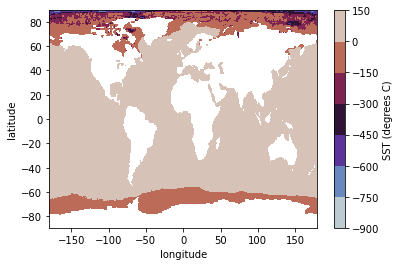

In [29]:
lon=sst_timemean['longitude']
lat=sst_timemean['latitude']

f=plt.figure()
plt.contourf(lon,lat,sst_timemean,cmap=plt.cm.twilight)
plt.xlabel('longitude')
plt.ylabel('latitude')
cb=plt.colorbar()
cb.set_label('SST (degrees C)')

Sanity check! Look at the colorbar: Values as low as -900 degC do not make physical sense! While this dataset is masking the continents correctly (white indicates masked values here), it appears that there must be a very negative number indicating where there are other negative numbers, perhaps where sea ice exists. Let's go back to replace the NaNs then recreate the mean. This time we use xarray's .where method to identify and replace very negative numbers:

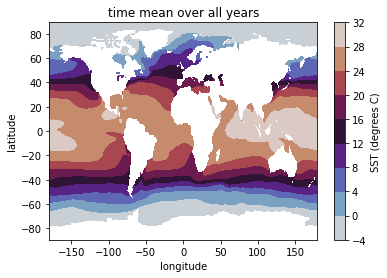

In [30]:
sst_timemean_mask=sst.where(sst>-300,np.nan).mean('time')

f=plt.figure()
plt.contourf(lon,lat,sst_timemean_mask,cmap=plt.cm.twilight)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('time mean over all years')
cb=plt.colorbar()
cb.set_label('SST (degrees C)')

Note how much more sense that makes! SST can be a little bit below 0 degC (salinity!), but not very much. Under sea ice, SST will stay pretty close to 0 degC. <br><br>
Now, let's try one more thing with this dataset. What if we want to calculate the monthly or yearly means? xarray makes this very easy by doing a groupby operation and then a mean across groups:

In [31]:
sst_monthly_mean=sst.where(sst>-300,np.nan).groupby('time.month').mean('time')
print(sst_monthly_mean)

<xarray.DataArray 'sst' (month: 12, latitude: 180, longitude: 360)>
array([[[-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        [-1.8      , -1.8      , -1.8      , ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999997, -1.7999997, -1.7999997, ..., -1.7999997,
         -1.7999997, -1.7999998],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8      , -1.8      , -1.8      , ..., -1.8      ,
         -1.8      , -1.8      ],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.8      , -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
...
        [       nan,        nan,        nan, ...,

Notice how we now have dimensions and coordinates of (month, latitude, longitude).  We can now use the .sel method to plot just one month, in this case June:

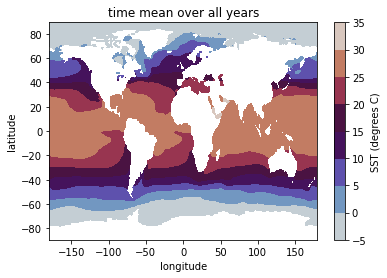

In [32]:
sst_junemean=sst_monthly_mean.sel(month=6)

f=plt.figure()
plt.contourf(lon,lat,sst_junemean,cmap=plt.cm.twilight)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('June mean over all years using xarray methods')
cb=plt.colorbar()
cb.set_label('SST (degrees C)')

Here's an equivalent numpy method for selecting the June monthly means:

<ipython-input-38-4ecce7568e4b>:2: RuntimeWarning: Mean of empty slice
  sst_junemean_np=np.nanmean(sst_np[5::12],axis=0)


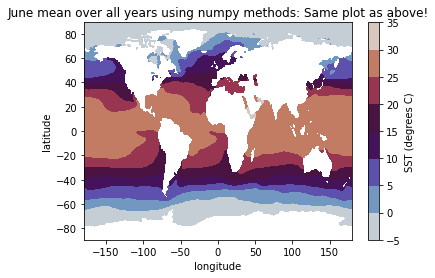

In [38]:
sst_np[sst_np<-300]=np.nan
sst_junemean_np=np.nanmean(sst_np[5::12],axis=0)  
#Python is zero-indexed, so to get the 6th month, use 5 as the index. Note how we had to remember that June=5. 
#And we really should've checked that the first index really did correspond to January. xarray's labeled indexing
#prevents these kinds of mistakes using labeled time series. We also didn't have to remember that there are 12 months...
                           

f=plt.figure()
plt.contourf(lon,lat,sst_junemean_np,cmap=plt.cm.twilight)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('June mean over all years using numpy methods: Same plot as above!')
cb=plt.colorbar()
cb.set_label('SST (degrees C)')

#### Dataset 4: ERA-Interim Reanalysis sea level pressure
Many datasets are available over the web to stream. For example, NASA maintains a THREDDS server with multiple reanalysis datasets (ERA, MERRA, CSFR, NCEP, JRA, etc.). To access these remote datasets, all we need is the URL. <br><br>
Using multiple reanalysis in an analysis is a strategy for gaining more evidence toward proving your hypothesis. Multiple lines of evidence are more convincing than only one line of evidence! Using the THREDDS server saves us the step of needing to download all the reanalyses ourselves and allows us to do more convincing science faster.  


In [ ]:
url='https://ds.nccs.nasa.gov/thredds/dodsC/bypass/CREATE-IP/reanalysis/ECMWF/IFS-Cy31r2/ERA-Interim/mon/atmos/psl.ncml'
ds2=xr.open_dataset(url)
print(ds2)

Now it's your turn. Identify the dimensions, coordinates, and variables in this dataset. What dimensions does sea level pressure have?:

Identify the attributes for sea level pressure (not the full dataset's global attributes!):

What do you think lat_bnds and lon_bnds are for?  

Make three new objects by selecting sea level pressure, longitude, and latitude from ds2:

Take the monthly climatology of sea level pressure:

Plot a map of the March-mean sea level pressure, making sure to correctly set the x-axis and y-axis to longitude and latitude, respectively. Include a colorbar. Pick a fun colormap if you want (see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html): 